In [2]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("coordinates-20-11-18.txt",sep = " ")
df

,i,x,y,side,frame,field,experiment
0,0,1061,7,dx,0,0,20-11-18
1,1,1067,16,dx,0,0,20-11-18
2,2,1074,23,dx,0,0,20-11-18
3,3,1086,29,dx,0,0,20-11-18
4,4,1095,36,dx,0,0,20-11-18
...,...,...,...,...,...,...,...
140395,95,367,1148,sx,2,7,20-11-18
140396,96,374,1161,sx,2,7,20-11-18
140397,97,383,1173,sx,2,7,20-11-18
140398,98,392,1184,sx,2,7,20-11-18


In [3]:
#divido fronti destri e sinistri
sdf = df[df["side"]=="sx"]
sdf = sdf.reset_index(drop = True)
ddf = df[df["side"]=="dx"]
ddf = ddf.reset_index(drop = True)

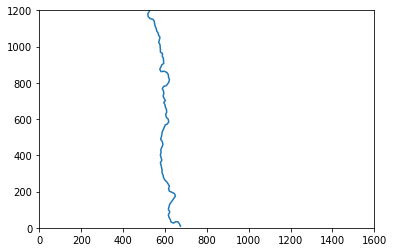

In [4]:
plt.xlim(0,1600)
plt.ylim(0,1200)
for i in range(13,14):
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])

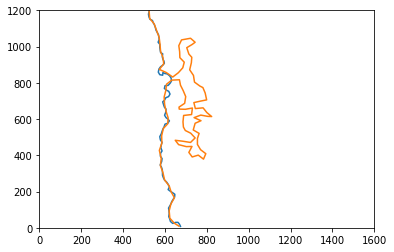

In [5]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
for i in range(11,13):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])

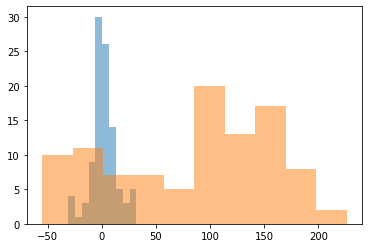

In [6]:
#vedo la distribuzione delle differenze tra le coordinate x dei frame
msd = pd.DataFrame()
for i in range(11,13):
    next_frame = sdf["x"][i*100:(i+1)*100].reset_index(inplace=False)
    previous_frame = sdf["x"][(i-1)*100:(i)*100].reset_index(inplace=False)
    msd =  next_frame - previous_frame    
    plt.hist(msd["x"],alpha = 0.5)

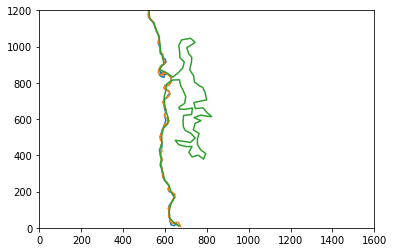

In [7]:
#tolgo il frame anomalo in base alla media delle differenze tra le coordinate del frame corrente e di quello 
#precedente


msd = pd.DataFrame()
for i in range(0,100):
    next_frame = sdf["x"][i*100:(i+1)*100].reset_index()
    previous_frame = sdf["x"][(i-1)*100:(i)*100].reset_index()
    msd =  next_frame - previous_frame    
    #plt.hist(msd["x"],alpha = 0.5)
    if msd["x"].mean() > 5:
        togli = [j for j in range(i*100,(i+1)*100)]
        #sdf = sdf.drop(togli)
        #sdf = sdf.reset_index(drop = True)
        
plt.xlim(0,1600)
plt.ylim(0,1200)
for i in range(10,13):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])


ok, ora però bisogna togliere anche quelli di destra, quindi provo a farlo direttamente dal dataframe principale

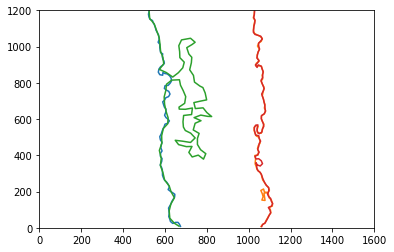

In [8]:
plt.xlim(0,1600)
plt.ylim(0,1200)

for field in range(1):
    for frame in range(11,13):
        sx = df[df["field"]== field]
        sx = sx[sx["frame"] == frame]
        sx = sx[sx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]

        plt.plot(sx["x"],sx["y"])
        plt.plot(dx["x"],dx["y"])

In [9]:
#df = df[df.frame != 12]
#in questo modo però tolgo il frame 12 da tutti i campi, non so se va bene però così tutti i campi avrebbero 
#lo stesso numero di frame

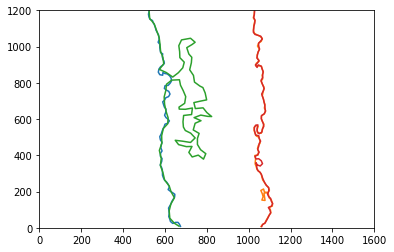

In [10]:
plt.xlim(0,1600)
plt.ylim(0,1200)

for field in range(0,1):
    for frame in range(11,13):
        sx = df[df["field"]== field]
        sx = sx[sx["frame"] == frame]
        sx = sx[sx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]

        plt.plot(sx["x"],sx["y"])
        plt.plot(dx["x"],dx["y"])

Aggiornamento 10 giugno: provo ad aggiungere la colonna booleana per dire se il frame è valido o no

In [11]:
df

,i,x,y,side,frame,field,experiment
0,0,1061,7,dx,0,0,20-11-18
1,1,1067,16,dx,0,0,20-11-18
2,2,1074,23,dx,0,0,20-11-18
3,3,1086,29,dx,0,0,20-11-18
4,4,1095,36,dx,0,0,20-11-18
...,...,...,...,...,...,...,...
140395,95,367,1148,sx,2,7,20-11-18
140396,96,374,1161,sx,2,7,20-11-18
140397,97,383,1173,sx,2,7,20-11-18
140398,98,392,1184,sx,2,7,20-11-18


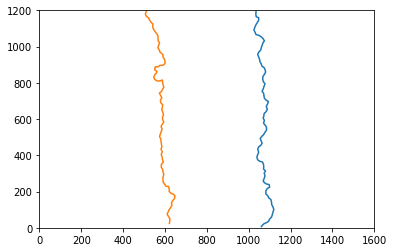

In [12]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
for i in range(2):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(df["x"][i*100:(i+1)*100],df["y"][i*100:(i+1)*100])
    df["Normal"] = True

In [8]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("coordinates-20-11-18.txt",sep = " ")
df["Normal"] = True
df

,i,x,y,side,frame,field,experiment,Normal
0,0,1061,7,dx,0,0,20-11-18,True
1,1,1067,16,dx,0,0,20-11-18,True
2,2,1074,23,dx,0,0,20-11-18,True
3,3,1086,29,dx,0,0,20-11-18,True
4,4,1095,36,dx,0,0,20-11-18,True
...,...,...,...,...,...,...,...,...
140395,95,367,1148,sx,2,7,20-11-18,True
140396,96,374,1161,sx,2,7,20-11-18,True
140397,97,383,1173,sx,2,7,20-11-18,True
140398,98,392,1184,sx,2,7,20-11-18,True


In [10]:
means = []
sqd = []
diff = pd.DataFrame()

for i in range(2,100):
    j = 1
    while df.loc[(i-2*j)*100]["Normal"] == False:
        j = j + 1
    x1 = df["x"][i*100:(i+1)*100].reset_index()
    x0 = df["x"][(i-2*j)*100:(i-1*j)*100].reset_index()
    diff =  x1 - x0    
    y1 = df["y"][i*100:(i+1)*100].reset_index()
    y0 = df["y"][(i-2*j)*100:(i-1*j)*100].reset_index()
    sd = np.sqrt((x1["x"]-x0["x"])**2 + (y1["y"]-y0["y"])**2)
    sqd.append(sd.mean())
    means.append(diff["x"].mean())
    if abs(diff["x"].mean()) > 50:
        df["Normal"][i*100:(i+1)*100] = False
        


/home/riccardo/miniconda/envs/sghe/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


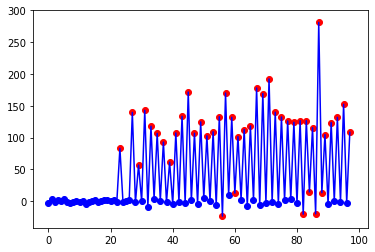

In [4]:
for i in range(len(means)):
    if abs(means[i])>10:
        c = "r"
    else: 
        c = "b"
    plt.scatter(i,means[i], c=c)

plt.plot(means,c="b")

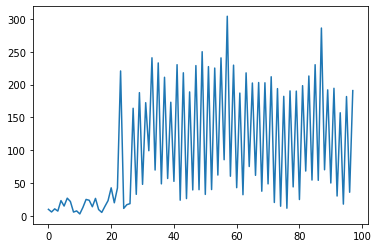

In [5]:
plt.plot(sqd)

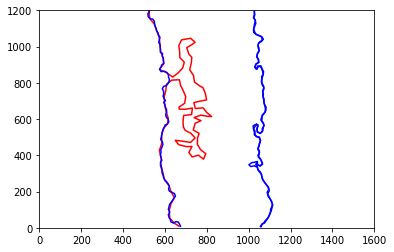

In [6]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
side = 1
for i in range(25,29):
    if df.loc[side*i*100]["Normal"] == True:
        c = "b"
    else:
        c = "r"
        
    plt.plot(df["x"][side*i*100:(side*i+1)*100],df["y"][side*i*100:(side*i+1)*100],c = c)